In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format = 'svg' # For mac users with Retina display

import numpy as np
from scipy import interpolate
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm  
import matplotlib.colors as mcolors

from rotation import *

arcmin2rad = np.pi / 180. / 60. 
rad2arcmin = 1./arcmin2rad

import warnings
warnings.filterwarnings('ignore')

In [2]:
cmbspec = np.loadtxt('fiducial_lensed_spectra.dat') # these are already D_ell

In [3]:
cmbspec[:,1] /= (cmbspec[:,0]*(cmbspec[:,0]+1)/2/np.pi)
cmbspec[:,2] /= (cmbspec[:,0]*(cmbspec[:,0]+1)/2/np.pi)
cmbspec[:,3] /= (cmbspec[:,0]*(cmbspec[:,0]+1)/2/np.pi)

Text(0, 0.5, '$\\ell^2 C_{\\ell}$')

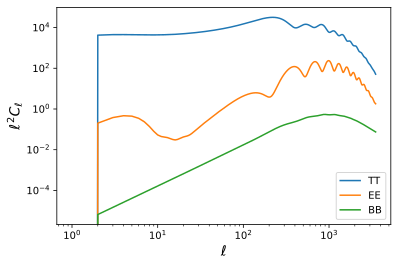

In [4]:
plt.loglog(cmbspec[:,0]**2*cmbspec[:,1], label='TT')
plt.loglog(cmbspec[:,0]**2*cmbspec[:,2], label='EE')
plt.loglog(cmbspec[:,0]**2*cmbspec[:,3], label='BB')
plt.legend()
plt.xlabel(r'$\ell$', size=14)
plt.ylabel(r'$\ell^2 C_{\ell}$', size=14)

In [5]:
cmbspec = cmbspec[:,1:] # GimmeClBBRot wants an array with the TT/EE/BB C_ells, so I'm dropping the first column that has ell

In [6]:
# This return an array with the BB power spectrum due to rotation (E-modes leaking to B-modes)
lrot, clbrot = GimmeClBBRot(cmbspec, nwanted=200, A_CB=1, )

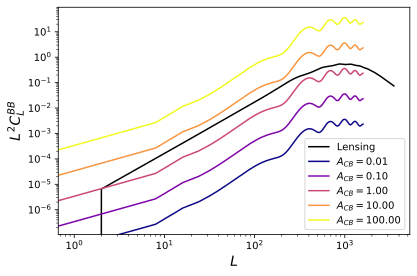

In [7]:
# Considering a generic scale-invariant rotatin power spectrum

plt.loglog(cmbspec[:,2]*np.arange(cmbspec.shape[0])**2, 'k', label='Lensing')

As = [0.01,0.1,1,10,100]
color = iter(cm.plasma(np.linspace(0,1,len(As))))

for A in As:
    c=next(color)
    lrot, clbrot = GimmeClBBRot(cmbspec, nwanted=200, A_CB=A)
    plt.loglog(lrot, lrot**2*clbrot, c=c, label='$A_{CB}=%.2f$'%A)
plt.xlabel(r'$L$', size=14)
plt.ylabel(r'$L^2 C_{L}^{BB}}$', size=14)
plt.legend(loc='lower right')
plt.tight_layout()


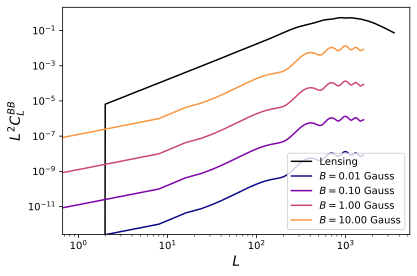

In [9]:
# ...and for rotation due to PMFs

plt.loglog(cmbspec[:,2]*np.arange(cmbspec.shape[0])**2, 'k', label='Lensing')

Bs = [0.01,0.1,1,10]
color = iter(cm.plasma(np.linspace(0,1,len(As))))

for B in Bs:
    c=next(color)
    lrot, clbrot = GimmeClBBRot(cmbspec, nwanted=200, kind='pmf', B=B, nu=150.)
    plt.loglog(lrot, lrot**2*clbrot, c=c, label='$B=%.2f$ Gauss'%B)
plt.xlabel(r'$L$', size=14)
plt.ylabel(r'$L^2 C_{L}^{BB}}$', size=14)
plt.legend(loc='lower right')
plt.tight_layout()
